## Seasonal New York County Air Pollution Analysis: IQR, Box Plot, Outliers

**Motivation for Questions & Objective**<br>
The team and I set out to explore pollution measurements and dissect data to answer the questions we collectively discussed. Los Angeles has always been surround by smog. We were curious about the air quality standards in LA and around the United States. Does the United States population care, or aware of what is considered good and moderate air quality? Will EV cars help with pollution? Lastly, the recent Covid pandemic led us to realize air pollution has cleared due to quarantine. When the quarantine is lifted, should we continue to wear masks?<br>
<br>
These topics led me to my questions which questions consisted of: 
* LA is smoggy... would like to know what our standards are for air quality.
* How bad is bad?
* Percentage Annually we live in neutral/good air?
    
**Exploration**<br>
EPA.gov provided full sample dataset via their API. The sample dataset consist of the county name searched from state and county number queried. EPA.gov API requests if a specific county is being queried, you must pass the two digit state number and three digit county number along with the Sample Data URL. The numbers for county and state can be found in the list data URL. <br><br>
    Sample data included site location measurements for nearly every hour of the day, for everyday of the year. The amount of information allowed me to separate the data in many ways including by season. Measurements by the day, and hour, can provide the percentage of time we live in good or neutral air. Lastly, every time frame includes sample measurements. EPA.gov has listed the PM 2.5 health index which informs us the severity levels in air pollution. Combining measurements with specific thresholds can give us answers on "How bad is bad?"
    
**Data Cleanup**<br>
The json received from our API call includes a lot of parameters I immediately did not need. The following paramters are kept and used througout the dataset in various ways: "state_code", "state", "county_code", "county", "site_number", parameter", "sample_measurement", "units_of_measure", "latitude", "longitude","date_local", "time_local" "date_gmt", "time_gmt", "method_type", "method_code", "method", "date_of_last_change",  "cbsa_code". <br><br>
    Pandas, Matplotlib, NumPy, and several other libraries are used in this notebook. The index is set to date_gmt for date time indexing. Date_gmt is removed and replaced with site_number as times for certain plots. 
    One value had appeared to be a single outlier, of the outliers, in the California dataset. At a measurement of '995.6'. The value was one of 38400 measurements. It was removed at the beginning. <br><br>
    A column named 'color' was added to the main dataset for all states. The value inside represented the hex color number related to the sample measurement. If the value is between 0-12.0, the green (#5cb85c) hex number is added in the color column. Sample measurement 12.1-35.4 receives yellow (#dbe36b), 35.5-55.4 orange (#e8970c) and 55.5+ red (#e80c0c). Colors are added for labeling on the scatter plot. 
    
**Analysis**<br>
Seasonal Analysis provided a high-level overview of air pollution and health standards we lived in throughout 2019. Cases such as Los Angeles, CA showed Los Angeles residents live in bad air quality for a third of the year. More than any of the top 5 most populated cities in the United States. Los Angeles is plagues with self-pollution such as automobiles but also unfortunate with weather. Rain drought has not been able to clear the air which triggered dangerous fires across the state. The fall season graph represents October fires destroying air quality. <br>

Another trend found in all seasonal and annual analysis of top 5 most populated cities include bad air conditions around New Years and the Fourth of July. Holidays involving fireworks make air quality dangerous for about a week.<br>

Weather and Holidays are a factor in air pollution but in some cases, may help air pollution. New York experiences storms around the same time California experiences fires. The fall storms have cleared the air quality in New York which usually would have higher PM 2.5 measurements. <br>

Box plot information displays each site location measurements for the period (ex: annual/seasonal). Each locations box plot displays the lowest reading and highest reading by box arm, Inter Quartile Range (IQR), Average measurement, and outliers. After researching outliers, outliers tend to be one or two days throughout the year and may represent holidays such as the fourth of July. 

**Summary**<br>
Annual and Seasonal datasets with higher populated areas involve higher air pollution measurements. Of the top 5 most populated cities, 3 have moderate air pollution levels a quarter of the year. Moderate levels emphasize 'people with respiratory or heart disease, the elderly and children should limit prolong exertion.' <br><br>
In this case, Los Angeles is our focus due to location of the report. Los Angeles air pollution is negatively impacted by multiple factors. Automobile and weather pollution contribute to the consistently moderate air quality the population of Los Angeles has grown accustom to.<br>

**Implications**<br>
I would like to continue to research weather measurements by day and the correlation it may have around air pollution by region. Also, following automobile emissions, we may be able to positively impact city air pollutions by thinking about our next big auto purchase. EV's are moving forward and can provide great positive impacts to any regions air quality measurements.

## Table of Contents<br>
* [Retrieving and Clean Data](#dataclean)
* [Season Sample Measurement Analysis](#beginseason)
    * [Spring](#springdata)
    * [Summer](#summerdata)
    * [Fall](#falldata)
    * [Winter](#winterdata)

----

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

import json
import copy
from typing import List
import csv


<a id='dataclean'></a>

Import saved csv. CSV includes data generated from 'StateCountySampleDataDF()' function.
Clean data.

In [3]:
# Import from .CSV
ny_nyc_df = pd.read_csv("./csv_data/newyork_ny.csv") 

In [4]:
# Verify california is in dataframe
assert ny_nyc_df['state'][0] == 'New York'

In [5]:
# Make copy before filtering
ny_filtered_df = ny_nyc_df.copy()

In [6]:
ny_filtered_df.head()

,state_code,state,county_code,county,site_number,parameter,sample_measurement,units_of_measure,latitude,longitude,date_local,time_local,date_gmt,time_gmt,method_type,method_code,method,date_of_last_change,cbsa_code
0,36,New York,61,New York,115,Acceptable PM2.5 AQI & Speciation Mass,9.6,Micrograms/cubic meter (LC),40.84955,-73.935649,2019-01-01,00:00,2019-01-01,05:00,Non-FRM,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,2019-06-04,35620
1,36,New York,61,New York,115,Acceptable PM2.5 AQI & Speciation Mass,11.0,Micrograms/cubic meter (LC),40.84955,-73.935649,2019-01-01,01:00,2019-01-01,06:00,Non-FRM,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,2019-06-04,35620
2,36,New York,61,New York,115,Acceptable PM2.5 AQI & Speciation Mass,9.7,Micrograms/cubic meter (LC),40.84955,-73.935649,2019-01-01,02:00,2019-01-01,07:00,Non-FRM,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,2019-06-04,35620
3,36,New York,61,New York,115,Acceptable PM2.5 AQI & Speciation Mass,9.0,Micrograms/cubic meter (LC),40.84955,-73.935649,2019-01-01,03:00,2019-01-01,08:00,Non-FRM,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,2019-06-04,35620
4,36,New York,61,New York,115,Acceptable PM2.5 AQI & Speciation Mass,8.9,Micrograms/cubic meter (LC),40.84955,-73.935649,2019-01-01,04:00,2019-01-01,09:00,Non-FRM,702,PM2.5 SCC w/Correction Factor - TEOM Gravimetr...,2019-06-04,35620


### Clean dataset.

In [7]:
ny_filtered_df['sample_measurement'].max()

133.3

In [8]:
# Select certain columns to use for mapping, 
ny_filtered_df=ny_filtered_df[['county','site_number','sample_measurement','latitude','longitude','time_local','date_gmt','time_gmt','date_of_last_change']]
# Drop nan values and empty values
ny_filtered_df=ny_filtered_df.dropna()
# Remove all numbers below 0 and above 400
ny_filtered_df=ny_filtered_df[(ny_filtered_df[['sample_measurement']] > 0).all(axis=1) & (ny_filtered_df[['sample_measurement']] < 400).all(axis=1)]

In [9]:
ny_filtered_noIndexChange = ny_filtered_df

In [10]:
# Assign date_gmt DateTimeIndex. Allows for date searching throug index.
ny_filtered_df['date_gmt']=pd.DatetimeIndex(ny_filtered_df['date_gmt'])
#Set index to date_gmt
ny_filtered_df = ny_filtered_df.set_index('date_gmt')

### Clean Copy dataset.

In [11]:
# Copy of clean data
ny_nyc_clean_data = ny_filtered_df.copy()

### Add Column: Add Color to specific sample measurement
Used in scatter plot later.

In [12]:
# Color thresholds
colors_list = []
for row in ny_nyc_clean_data['sample_measurement']:
    # if more than a value,
    if row > 55.5:
        # Append color value
        colors_list.append('#e80c0c')
    # else, if more than a value,
    elif row > 35.5:
        # Append color value
        colors_list.append('#e8970c')
    elif row > 12.1:
        # Append color value
        colors_list.append('#dbe36b')
    elif row > 0:
        # Append color value
        colors_list.append('#5cb85c')
    else:
        # Append a failing grade
        colors_list.append('Failed')
        #print(f'failed to apply color on row {row}')
        
# Create a column from the list
ny_nyc_clean_data['color'] = colors_list

ny_nyc_clean_data['color'].value_counts()

#5cb85c    24754
#dbe36b     3911
#e8970c       15
#e80c0c        7
Name: color, dtype: int64

In [13]:
# Check for Failed values. No Failed values.
assert any(ny_nyc_clean_data['color'] == 'Failed') == False


* 40.81976,-73.94825= West Harlen, NY (135)
* 40.81976,-73.94825= Lower Manhattan, NY (134)
* 40.81976,-73.94825= Hudson Heights, NY (115)
* 40.81976,-73.94825= East Village, NY (128)

<a id='beginseason'></a>

## Begin Season Sample Measurement Analysis
* Spring, Summer, Fall, Winter
    * Scatter Plot
    * IQR Results
    * Box Plots
    * Outliers

<a id='springdata'></a>

### Season: Spring

In [15]:
# Sort by date_gmt and time_gmt
spring_ny_nyc = ny_nyc_clean_data['2019-03-01':'2019-05-31']

**Reset index for and set new index for box plot.**

In [16]:
spring_ny_nyc_box=spring_ny_nyc.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Spring

Input dataframe name below. Make loop later.

In [17]:
# dataframe to plot
plot_df = spring_ny_nyc.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [18]:
color_threshold = plot_df.color

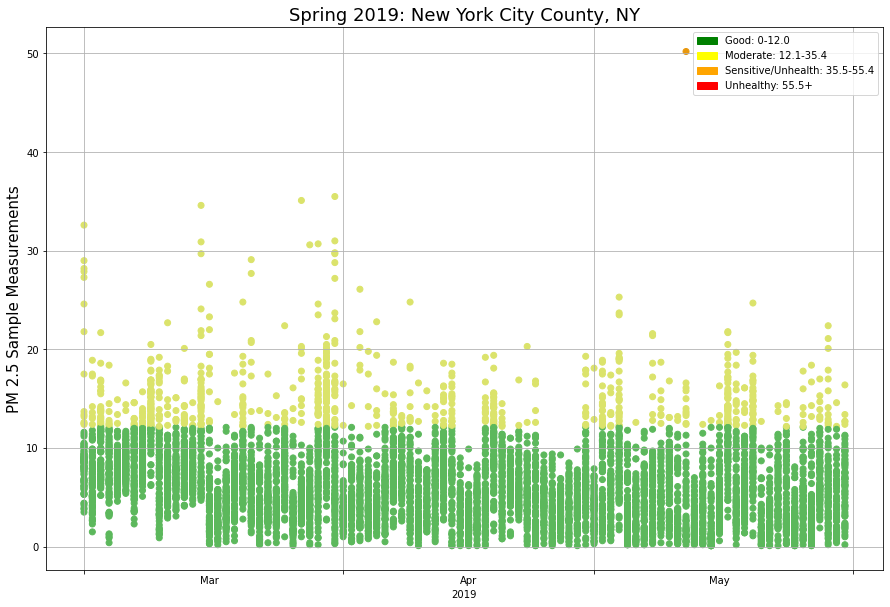

In [19]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Spring 2019: New York City County, NY', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/NY_spring_pm25_scatter.png")
plt.show()

#### Site Number Seperation: Spring

In [20]:
# Seperate by site_number
spring_ny_nyc['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
spring_site_number_135=spring_ny_nyc[(spring_ny_nyc[['site_number']]==135).all(axis=1)]
spring_site_number_134=spring_ny_nyc[(spring_ny_nyc[['site_number']]==134).all(axis=1)]
spring_site_number_115=spring_ny_nyc[(spring_ny_nyc[['site_number']]==115).all(axis=1)]
spring_site_number_128=spring_ny_nyc[(spring_ny_nyc[['site_number']]==128).all(axis=1)]


In [21]:
spring_site_number_135=spring_site_number_135[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
spring_site_number_134=spring_site_number_134[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
spring_site_number_115=spring_site_number_115[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
spring_site_number_128=spring_site_number_128[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)


In [22]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ny_nyc_box_list = spring_ny_nyc.site_number.sort_values().unique().tolist()

In [23]:
filtered_ny_nyc_box_list

[115, 128, 134, 135]

#### Begin IQR for Box Plots

In [24]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_spring=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ny_nyc_box_list:
    location = spring_ny_nyc_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_spring.append(location)
measurement_quartile_spring

[0.25    3.0
 0.50    5.6
 0.75    8.8
 Name: sample_measurement, dtype: float64,
 0.25    3.5
 0.50    6.2
 0.75    9.9
 Name: sample_measurement, dtype: float64,
 0.25    3.3
 0.50    5.8
 0.75    8.4
 Name: sample_measurement, dtype: float64,
 0.25    3.5
 0.50    5.5
 0.75    8.1
 Name: sample_measurement, dtype: float64]

In [25]:
iqr_all_spring = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_spring)):
    iqr = (measurement_quartile_spring[i][0.75])-(measurement_quartile_spring[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_spring.append(iqr)
#print(iqr_all_spring)

# Round numbers to 1 number after decimal.
round_iqr_all_spring = [round(num, 2) for num in iqr_all_spring]

In [26]:
# Show list. Verify we have correct amount
assert len(iqr_all_spring) == 4

In [27]:
host_site_num=['115', '128', '134', '135']
# Column/Label list
headers_list=['Hudson Heights, NY (115)','East Village, NY (128)','Lower Manhattan, NY (134)','West Harlen, NY (135)']

# Combine both for loop generated list into one.
measurements_iqr_all_spring = [dict(zip(headers_list, round_iqr_all_spring))]
measurements_iqr_all_spring

[{'Hudson Heights, NY (115)': 5.8,
  'East Village, NY (128)': 6.4,
  'Lower Manhattan, NY (134)': 5.1,
  'West Harlen, NY (135)': 4.6}]

#### Begin Box Plots

In [28]:
# Values for plotting
box_values_spring = round_iqr_all_spring
# Sort to determine outliers
values_sorted_spring = sorted(box_values_spring)
print(values_sorted_spring)

[4.6, 5.1, 5.8, 6.4]


In [29]:
# Sample measurement values per site location
spring_site_135_measurements = spring_site_number_135['sample_measurement']
spring_site_134_measurements = spring_site_number_134['sample_measurement']
spring_site_115_measurements = spring_site_number_115['sample_measurement']
spring_site_128_measurements = spring_site_number_128['sample_measurement']

Number of Samples Measured: 8098


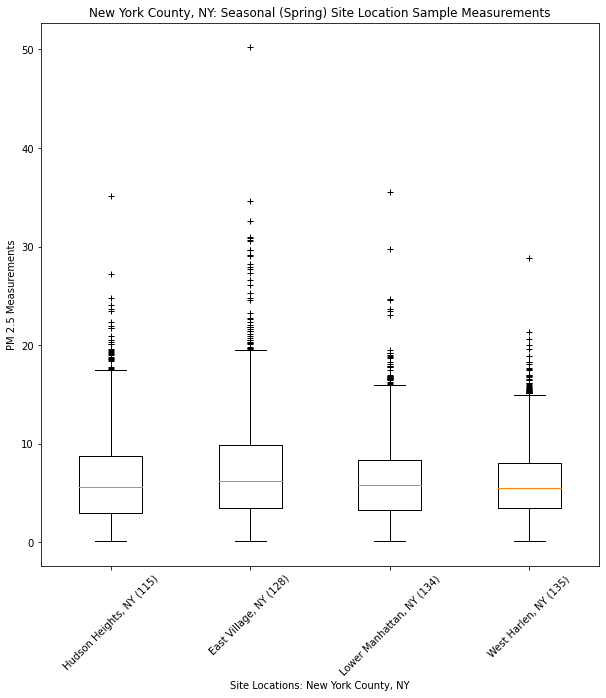

In [30]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [spring_site_115_measurements,spring_site_128_measurements,spring_site_134_measurements,spring_site_135_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: New York County, NY')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('New York County, NY: Seasonal (Spring) Site Location Sample Measurements')

plt.savefig("./Images/NY_spring_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(spring_ny_nyc)}')
plt.show()


#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [31]:
# Hudson Heights, NY (115) Outliers
hh_spring_outliers = bp["fliers"][2].get_data()[1]
hh_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_115_measurements)}')
print(f'Total amount of outliers: {len(hh_spring_outliers)}')
print(f'Hudson Heights Outlier values: {hh_spring_outliers}')

Total amount samples in set: 1972
Total amount of outliers: 37
Hudson Heights Outlier values: [16.1 16.2 16.3 16.5 16.6 16.6 16.6 16.6 16.7 16.7 16.7 16.8 16.8 16.9
 16.9 17.  17.5 17.8 17.8 17.9 17.9 18.1 18.3 18.7 18.8 18.9 19.  19.2
 19.2 19.5 23.1 23.5 23.7 24.6 24.7 29.8 35.5]


In [32]:
# East Village, NY (128) Outliers
ev_spring_outliers = bp["fliers"][3].get_data()[1]
ev_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_128_measurements)}')
print(f'Total amount of outliers: {len(ev_spring_outliers)}')
print(f'East Village Outlier values: {ev_spring_outliers}')

Total amount samples in set: 1941
Total amount of outliers: 42
East Village Outlier values: [15.2 15.2 15.2 15.2 15.3 15.3 15.3 15.4 15.4 15.4 15.5 15.5 15.6 15.6
 15.7 15.8 15.8 15.9 16.  16.1 16.2 16.2 16.5 16.5 16.6 16.8 16.9 16.9
 17.  17.  17.5 17.6 17.7 18.1 18.3 18.3 18.9 19.6 20.  20.6 21.3 28.8]


In [33]:
# Lower Manhattan, NY (134) Outliers
lm_spring_outliers = bp["fliers"][1].get_data()[1]
lm_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_134_measurements)}')
print(f'Total amount of outliers: {len(lm_spring_outliers)}')
print(f'Lower Manhattan Outlier values: {lm_spring_outliers}')

Total amount samples in set: 2024
Total amount of outliers: 44
Lower Manhattan Outlier values: [19.6 19.7 19.7 19.8 20.1 20.2 20.2 20.3 20.5 20.5 20.7 20.9 21.1 21.4
 21.4 21.6 21.8 21.8 21.8 22.  22.4 22.7 22.8 23.3 24.6 24.8 25.3 26.1
 26.6 27.3 27.7 27.9 28.2 29.  29.1 29.7 29.7 30.6 30.7 30.9 31.  32.6
 34.6 50.2]


In [34]:
# West harlem, NY (135) Outliers
westharlem_spring_outliers = bp["fliers"][0].get_data()[1]
westharlem_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_135_measurements)}')
print(f'Total amount of outliers: {len(westharlem_spring_outliers)}')
print(f'West harlem Outlier values: {westharlem_spring_outliers}')

Total amount samples in set: 2161
Total amount of outliers: 31
West harlem Outlier values: [17.6 17.7 17.8 18.4 18.5 18.6 18.6 18.7 18.8 19.  19.1 19.2 19.3 19.4
 19.5 19.6 20.1 20.1 20.3 20.5 20.9 21.7 21.7 21.9 22.4 23.5 23.7 24.1
 24.8 27.2 35.1]


<a id='summerdata'></a>

## Season: Summer

In [35]:
# Sort by date_gmt and time_gmt
summer_ny_nyc = ny_nyc_clean_data['2019-06-01':'2019-08-31'].sort_values(["date_gmt", "time_gmt"])

**Reset index for and set new index for box plot.**

In [36]:
summer_ny_nyc_box=summer_ny_nyc.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Summer

Input dataframe name below. Make loop later.

In [37]:
# dataframe to plot
plot_df = summer_ny_nyc.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [38]:
color_threshold = plot_df.color

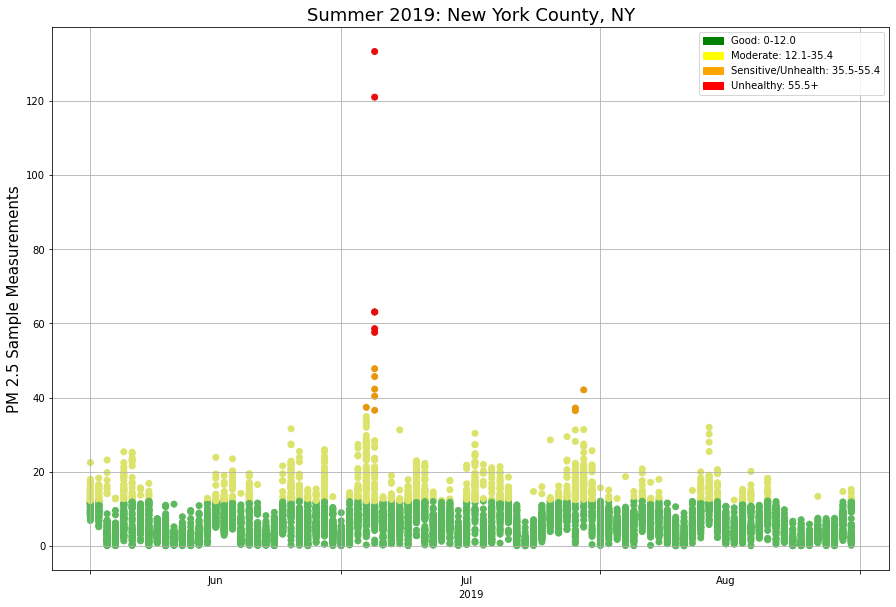

In [39]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Summer 2019: New York County, NY', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/NY_summer_pm25_scatter.png")
plt.show()

In [40]:
# Seperate by site_number
summer_ny_nyc['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
summer_site_number_135=summer_ny_nyc[(summer_ny_nyc[['site_number']]==135).all(axis=1)]
summer_site_number_134=summer_ny_nyc[(summer_ny_nyc[['site_number']]==134).all(axis=1)]
summer_site_number_115=summer_ny_nyc[(summer_ny_nyc[['site_number']]==115).all(axis=1)]
summer_site_number_128=summer_ny_nyc[(summer_ny_nyc[['site_number']]==128).all(axis=1)]

In [41]:
summer_site_number_135=summer_site_number_135[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
summer_site_number_134=summer_site_number_134[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
summer_site_number_115=summer_site_number_115[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
summer_site_number_128=summer_site_number_128[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)


In [42]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ny_nyc_box_list = summer_ny_nyc.site_number.sort_values().unique().tolist()
filtered_ny_nyc_box_list

[115, 128, 134, 135]

#### Begin IQR for Box Plots

In [43]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_summer=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ny_nyc_box_list:
    location = summer_ny_nyc_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_summer.append(location)
measurement_quartile_summer

[0.25    3.000
 0.50    5.800
 0.75    9.825
 Name: sample_measurement, dtype: float64,
 0.25     3.8
 0.50     6.9
 0.75    11.0
 Name: sample_measurement, dtype: float64,
 0.25     3.7
 0.50     6.6
 0.75    10.6
 Name: sample_measurement, dtype: float64,
 0.25    3.0
 0.50    5.8
 0.75    9.5
 Name: sample_measurement, dtype: float64]

In [44]:
iqr_all_summer = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_summer)):
    iqr = (measurement_quartile_summer[i][0.75])-(measurement_quartile_summer[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_summer.append(iqr)
#print(iqr_all_summer)

# Round numbers to 1 number after decimal.
round_iqr_all_summer = [round(num, 2) for num in iqr_all_summer]

In [45]:
# Show list. Verify we have correct amount
assert len(iqr_all_summer) == 4

In [46]:
# Combine both for loop generated list into one.
measurements_iqr_all_summer = [dict(zip(headers_list, round_iqr_all_summer))]
measurements_iqr_all_summer

[{'Hudson Heights, NY (115)': 6.83,
  'East Village, NY (128)': 7.2,
  'Lower Manhattan, NY (134)': 6.9,
  'West Harlen, NY (135)': 6.5}]

#### Begin Box Plots

In [47]:
# Values for plotting
box_values_summer = round_iqr_all_summer
# Sort to determine outliers
values_sorted_summer = sorted(box_values_summer)
print(values_sorted_summer)

[6.5, 6.83, 6.9, 7.2]


In [48]:
# Sample measurement values per site location
summer_site_135_measurements = summer_site_number_135['sample_measurement']
summer_site_134_measurements = summer_site_number_134['sample_measurement']
summer_site_115_measurements = summer_site_number_115['sample_measurement']
summer_site_128_measurements = summer_site_number_128['sample_measurement']

Number of Samples Measured: 6851


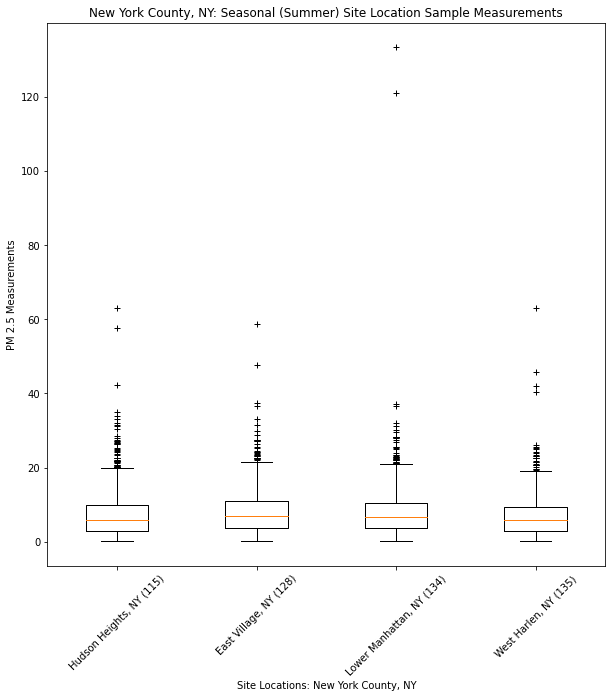

In [49]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [summer_site_115_measurements,summer_site_128_measurements,summer_site_134_measurements,summer_site_135_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: New York County, NY')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('New York County, NY: Seasonal (Summer) Site Location Sample Measurements')

plt.savefig("./Images/NY_summer_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(summer_ny_nyc)}')
plt.show()

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [50]:
# Hudson Heights, NY (115) Outliers
hh_summer_outliers = bp["fliers"][2].get_data()[1]
hh_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_115_measurements)}')
print(f'Total amount of outliers: {len(hh_summer_outliers)}')
print(f'Hudson Heights Outlier values: {hh_summer_outliers}')

Total amount samples in set: 1972
Total amount of outliers: 41
Hudson Heights Outlier values: [ 21.1  21.2  21.2  21.2  21.4  21.6  22.   22.   22.2  22.3  22.3  22.4
  22.5  22.6  22.9  22.9  23.   23.2  23.3  23.5  23.9  24.9  25.4  25.5
  25.7  26.8  27.4  27.9  28.   28.2  28.3  28.3  28.4  29.5  30.2  31.3
  32.   36.5  37.2 121.  133.3]


In [51]:
# East Village, NY (128) Outliers
ev_summer_outliers = bp["fliers"][3].get_data()[1]
ev_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_128_measurements)}')
print(f'Total amount of outliers: {len(ev_summer_outliers)}')
print(f'East Village Outlier values: {ev_summer_outliers}')

Total amount samples in set: 967
Total amount of outliers: 28
East Village Outlier values: [19.5 19.6 19.6 20.2 20.6 20.7 20.8 20.8 21.  21.4 21.5 21.7 22.5 22.6
 22.7 23.1 23.1 23.4 24.  24.2 24.9 25.3 25.5 26.  40.4 42.1 45.7 63.1]


In [52]:
# Lower Manhattan, NY (134) Outliers
lm_summer_outliers = bp["fliers"][1].get_data()[1]
lm_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_134_measurements)}')
print(f'Total amount of outliers: {len(lm_summer_outliers)}')
print(f'Lower Manhattan Outlier values: {lm_summer_outliers}')

Total amount samples in set: 2026
Total amount of outliers: 32
Lower Manhattan Outlier values: [22.1 22.3 22.4 22.5 22.5 22.5 22.7 23.2 23.2 23.3 23.5 23.7 23.9 24.3
 24.3 24.5 25.3 25.5 26.4 27.2 27.3 27.4 27.5 27.5 28.9 29.8 31.6 33.
 36.6 37.4 47.8 58.6]


In [53]:
# West harlem, NY (135) Outliers
westharlem_summer_outliers = bp["fliers"][0].get_data()[1]
westharlem_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_135_measurements)}')
print(f'Total amount of outliers: {len(westharlem_summer_outliers)}')
print(f'West harlem Outlier values: {westharlem_summer_outliers}')

Total amount samples in set: 1882
Total amount of outliers: 51
West harlem Outlier values: [20.1 20.2 20.2 20.2 20.3 20.3 20.4 20.5 20.8 20.8 20.8 21.2 21.4 21.6
 21.8 21.8 21.8 21.9 21.9 22.  22.1 22.5 22.6 22.7 23.5 23.7 24.3 24.6
 24.8 25.1 25.2 26.3 26.5 26.6 26.7 26.8 27.1 27.3 27.5 27.9 28.6 30.4
 31.3 31.4 32.  33.  33.8 34.9 42.3 57.6 63.1]


<a id='falldata'></a>

## Season: Fall

In [54]:
# Sort by date_gmt and time_gmt
fall_ny_nyc = ny_nyc_clean_data['2019-09-01':'2019-11-30'].sort_values(["date_gmt", "time_gmt"])

**Reset index for and set new index for box plot.**

In [55]:
fall_ny_nyc_box=fall_ny_nyc.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Fall

Input dataframe name below. Make loop later.

In [56]:
# dataframe to plot
plot_df = fall_ny_nyc.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [57]:
color_threshold = plot_df.color

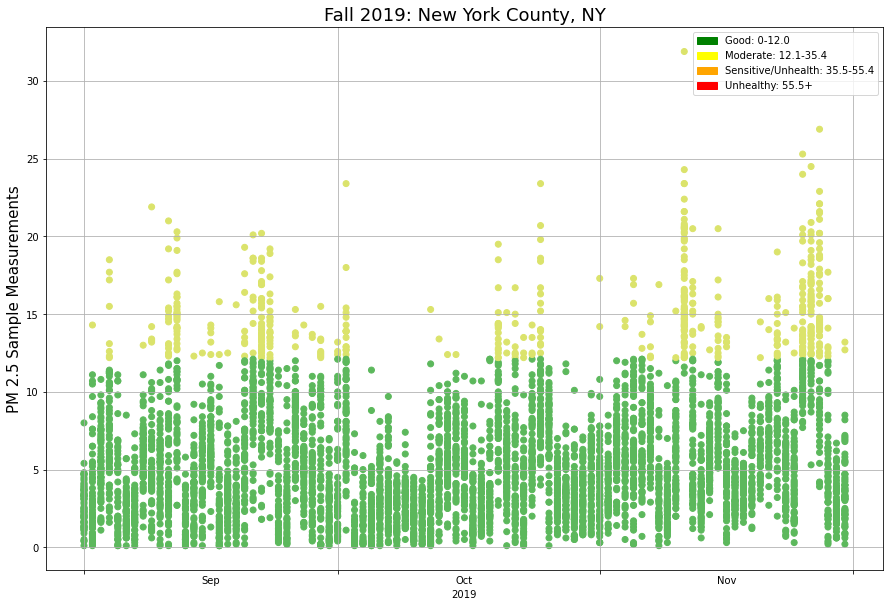

In [58]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Fall 2019: New York County, NY', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/NY_fall_pm25_scatter.png")
plt.show()

#### Site Number Seperation: Fall

In [59]:
# Seperate by site_number
fall_ny_nyc['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
fall_site_number_135=fall_ny_nyc[(fall_ny_nyc[['site_number']]==135).all(axis=1)]
fall_site_number_134=fall_ny_nyc[(fall_ny_nyc[['site_number']]==134).all(axis=1)]
fall_site_number_115=fall_ny_nyc[(fall_ny_nyc[['site_number']]==115).all(axis=1)]
fall_site_number_128=fall_ny_nyc[(fall_ny_nyc[['site_number']]==128).all(axis=1)]


In [60]:
fall_site_number_135=fall_site_number_135[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
fall_site_number_134=fall_site_number_134[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
fall_site_number_115=fall_site_number_115[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
fall_site_number_128=fall_site_number_128[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)


In [61]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ny_nyc_box_list = fall_ny_nyc.site_number.sort_values().unique().tolist()
filtered_ny_nyc_box_list

[115, 134, 135]

#### Begin IQR for Box Plots

In [62]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_fall=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ny_nyc_box_list:
    location = fall_ny_nyc_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_fall.append(location)
measurement_quartile_fall

[0.25    2.8
 0.50    5.1
 0.75    8.2
 Name: sample_measurement, dtype: float64,
 0.25    2.8
 0.50    4.8
 0.75    7.9
 Name: sample_measurement, dtype: float64,
 0.25    2.500
 0.50    4.300
 0.75    6.925
 Name: sample_measurement, dtype: float64]

In [63]:
iqr_all_fall = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_fall)):
    iqr = (measurement_quartile_fall[i][0.75])-(measurement_quartile_fall[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_fall.append(iqr)
#print(iqr_all_spring)

# Round numbers to 1 number after decimal.
round_iqr_all_fall = [round(num, 2) for num in iqr_all_fall]

In [64]:
# Show list. Verify we have correct amount
assert len(iqr_all_fall) >= 3

In [65]:
# Combine both for loop generated list into one.
measurements_iqr_all_fall = [dict(zip(headers_list, round_iqr_all_fall))]
measurements_iqr_all_fall

[{'Hudson Heights, NY (115)': 5.4,
  'East Village, NY (128)': 5.1,
  'Lower Manhattan, NY (134)': 4.43}]

#### Begin Box Plots

In [66]:
# Values for plotting
box_values_fall = round_iqr_all_fall
# Sort to determine outliers
values_sorted_fall = sorted(box_values_fall)
print(values_sorted_fall)

[4.43, 5.1, 5.4]


In [67]:
# Sample measurement values per site location
fall_site_135_measurements = fall_site_number_135['sample_measurement']
fall_site_134_measurements = fall_site_number_134['sample_measurement']
fall_site_115_measurements = fall_site_number_115['sample_measurement']
fall_site_128_measurements = fall_site_number_128['sample_measurement']

Number of Samples Measured: 6028. No measurements for East Village.


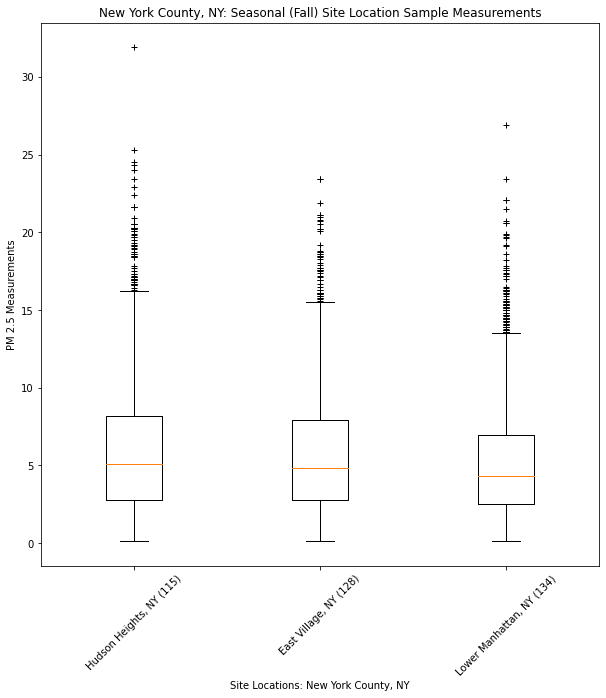

In [68]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [fall_site_115_measurements,fall_site_134_measurements,fall_site_135_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: New York County, NY')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('New York County, NY: Seasonal (Fall) Site Location Sample Measurements')

plt.savefig("./Images/NY_fall_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(fall_ny_nyc)}. No measurements for East Village.')
plt.show()

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [69]:
# Hudson Heights, NY (115) Outliers
hh_fall_outliers = bp["fliers"][2].get_data()[1]
hh_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_115_measurements)}')
print(f'Total amount of outliers: {len(hh_fall_outliers)}')
print(f'Hudson Heights Outlier values: {hh_fall_outliers}')

Total amount samples in set: 2014
Total amount of outliers: 90
Hudson Heights Outlier values: [13.6 13.6 13.6 13.6 13.6 13.7 13.7 13.7 13.8 13.9 13.9 13.9 13.9 13.9
 14.  14.  14.1 14.1 14.2 14.3 14.3 14.3 14.4 14.4 14.4 14.5 14.5 14.5
 14.6 14.7 14.7 14.7 14.8 14.8 15.  15.  15.  15.  15.  15.1 15.1 15.1
 15.2 15.2 15.3 15.3 15.3 15.4 15.4 15.5 15.5 15.6 15.6 15.7 15.9 16.
 16.1 16.1 16.2 16.2 16.3 16.3 16.3 16.4 16.5 17.  17.2 17.2 17.3 17.4
 17.6 17.6 17.7 17.8 18.2 18.6 19.1 19.2 19.6 19.7 19.8 19.9 20.6 20.6
 20.7 21.5 22.1 22.1 23.4 26.9]


In [70]:
# East Village, NY (128) Outliers
# ev_fall_outliers = bp["fliers"][3].get_data()[1]
# ev_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_128_measurements)}')
# print(f'Total amount of outliers: {len(ev_fall_outliers)}')
# print(f'East Village Outlier values: {ev_fall_outliers}')

Total amount samples in set: 0


In [71]:
# Lower Manhattan, NY (134) Outliers
lm_fall_outliers = bp["fliers"][1].get_data()[1]
lm_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_134_measurements)}')
print(f'Total amount of outliers: {len(lm_fall_outliers)}')
print(f'Lower Manhattan Outlier values: {lm_fall_outliers}')

Total amount samples in set: 2010
Total amount of outliers: 51
Lower Manhattan Outlier values: [15.6 15.7 15.8 15.8 15.9 15.9 16.  16.  16.1 16.1 16.1 16.1 16.3 16.3
 16.5 16.7 16.9 16.9 17.1 17.2 17.4 17.5 17.6 17.6 17.6 17.7 17.7 17.9
 18.  18.3 18.4 18.5 18.5 18.6 18.6 18.7 18.7 18.8 19.2 20.1 20.2 20.2
 20.5 20.7 20.8 21.  21.1 21.1 21.9 23.4 23.4]


In [72]:
# West harlem, NY (135) Outliers
westharlem_fall_outliers = bp["fliers"][0].get_data()[1]
westharlem_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_135_measurements)}')
print(f'Total amount of outliers: {len(westharlem_fall_outliers)}')
print(f'West harlem Outlier values: {westharlem_fall_outliers}')

Total amount samples in set: 2004
Total amount of outliers: 66
West harlem Outlier values: [16.3 16.4 16.6 16.6 16.7 16.7 16.7 16.7 16.8 16.9 16.9 16.9 17.  17.
 17.  17.1 17.1 17.1 17.2 17.3 17.3 17.5 17.7 17.8 18.4 18.4 18.5 18.5
 18.6 18.6 18.6 18.7 18.9 19.  19.1 19.2 19.2 19.3 19.5 19.7 19.7 19.8
 19.9 20.1 20.1 20.2 20.2 20.3 20.3 20.3 20.5 20.5 20.5 20.5 20.9 21.6
 21.6 21.6 22.4 22.9 23.4 24.  24.3 24.5 25.3 31.9]


<a id='winterdata'></a>

## Season: Winter

In [73]:
# Beginning of the year Winter
# Sort by date_gmt and time_gmt
winter_ny_nyc = ny_nyc_clean_data['2019-01-01':'2019-02'].sort_values(["date_gmt", "time_gmt"])
winter_ny_nyc

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change,color
date_gmt,,,,,,,,,
2019-01-01,New York,115,9.6,40.84955,-73.935649,00:00,05:00,2019-06-04,#5cb85c
2019-01-01,New York,128,5.9,40.73000,-73.984000,00:00,05:00,2019-06-04,#5cb85c
2019-01-01,New York,135,4.8,40.81976,-73.948250,00:00,05:00,2019-06-04,#5cb85c
2019-01-01,New York,115,11.0,40.84955,-73.935649,01:00,06:00,2019-06-04,#5cb85c
2019-01-01,New York,128,4.5,40.73000,-73.984000,01:00,06:00,2019-06-04,#5cb85c
...,...,...,...,...,...,...,...,...,...
2019-02-28,New York,135,7.4,40.81976,-73.948250,17:00,22:00,2019-04-08,#5cb85c
2019-02-28,New York,115,9.4,40.84955,-73.935649,18:00,23:00,2019-04-08,#5cb85c
2019-02-28,New York,128,13.4,40.73000,-73.984000,18:00,23:00,2019-04-08,#dbe36b


**Reset index for and set new index for box plot.**

In [74]:
winter_ny_nyc_box=winter_ny_nyc.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Winter

Input dataframe name below. Make loop later.

In [75]:
# dataframe to plot
plot_df = winter_ny_nyc.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [76]:
color_threshold = plot_df.color

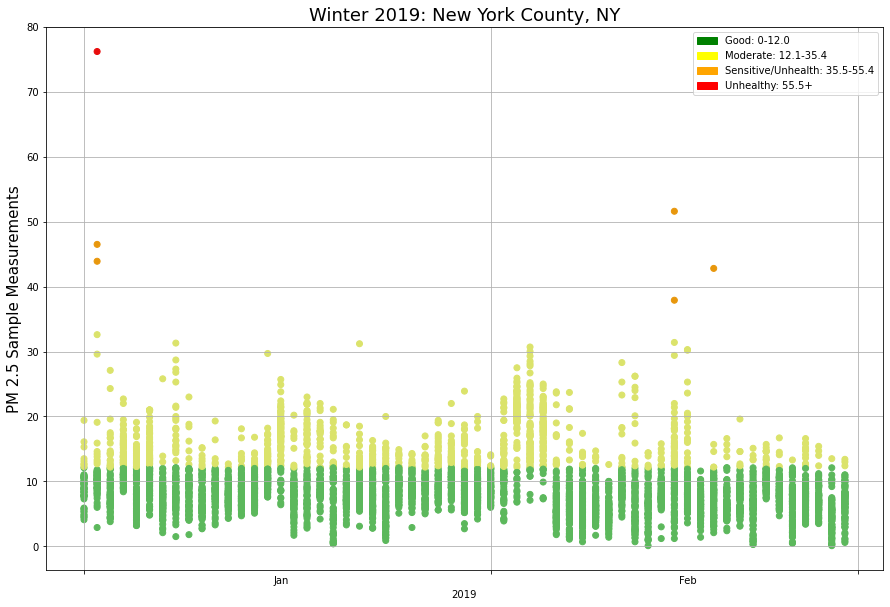

In [77]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Winter 2019: New York County, NY', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/NY_winter_pm25_scatter.png")
plt.show()

In [78]:
# Seperate by site_number
winter_ny_nyc['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
winter_site_number_135=winter_ny_nyc[(winter_ny_nyc[['site_number']]==135).all(axis=1)]
winter_site_number_134=winter_ny_nyc[(winter_ny_nyc[['site_number']]==134).all(axis=1)]
winter_site_number_115=winter_ny_nyc[(winter_ny_nyc[['site_number']]==115).all(axis=1)]
winter_site_number_128=winter_ny_nyc[(winter_ny_nyc[['site_number']]==128).all(axis=1)]

In [79]:
winter_site_number_135=winter_site_number_135[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
winter_site_number_134=winter_site_number_134[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
winter_site_number_115=winter_site_number_115[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
winter_site_number_128=winter_site_number_128[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)

In [80]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ny_nyc_box_list = winter_ny_nyc.site_number.sort_values().unique().tolist()
filtered_ny_nyc_box_list

[115, 128, 134, 135]

#### Begin IQR for Box Plots

In [81]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_winter=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ny_nyc_box_list:
    location = winter_ny_nyc_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_winter.append(location)
measurement_quartile_winter

[0.25     7.3
 0.50     9.7
 0.75    12.4
 Name: sample_measurement, dtype: float64,
 0.25     6.5
 0.50     9.1
 0.75    12.3
 Name: sample_measurement, dtype: float64,
 0.25     6.2
 0.50     8.3
 0.75    10.6
 Name: sample_measurement, dtype: float64,
 0.25    6.2
 0.50    7.9
 0.75    9.9
 Name: sample_measurement, dtype: float64]

In [82]:
iqr_all_winter = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_winter)):
    iqr = (measurement_quartile_winter[i][0.75])-(measurement_quartile_winter[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_winter.append(iqr)
#print(iqr_all_spring)

# Round numbers to 1 number after decimal.
round_iqr_all_winter = [round(num, 2) for num in iqr_all_winter]

In [83]:
# Show list. Verify we have correct amount
assert len(iqr_all_winter) == 4

In [84]:
# Combine both for loop generated list into one.
measurements_iqr_all_winter = [dict(zip(headers_list, round_iqr_all_winter))]
measurements_iqr_all_winter

[{'Hudson Heights, NY (115)': 5.1,
  'East Village, NY (128)': 5.8,
  'Lower Manhattan, NY (134)': 4.4,
  'West Harlen, NY (135)': 3.7}]

#### Begin Box Plots

In [85]:
# Values for plotting
box_values_winter = round_iqr_all_winter
# Sort to determine outliers
values_sorted_winter = sorted(box_values_winter)
print(values_sorted_winter)

[3.7, 4.4, 5.1, 5.8]


In [86]:
# Sample measurement values per site location
winter_site_135_measurements = winter_site_number_135['sample_measurement']
winter_site_134_measurements = winter_site_number_134['sample_measurement']
winter_site_115_measurements = winter_site_number_115['sample_measurement']
winter_site_128_measurements = winter_site_number_128['sample_measurement']

Number of Samples Measured: 5503


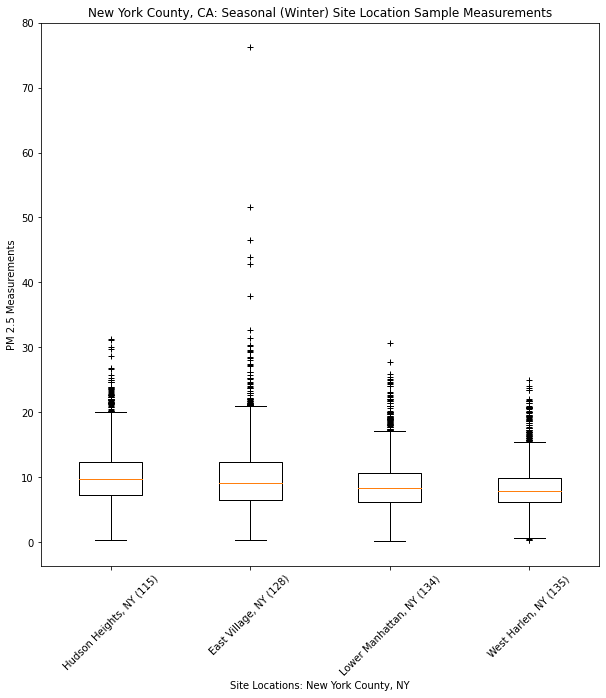

In [87]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [winter_site_115_measurements,winter_site_128_measurements,winter_site_134_measurements,winter_site_135_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: New York County, NY')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('New York County, CA: Seasonal (Winter) Site Location Sample Measurements')

plt.savefig("./Images/NY_winter_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(winter_ny_nyc)}')
plt.show()

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [88]:
# East Village, NY (128) Outliers
ev_winter_outliers = bp["fliers"][3].get_data()[1]
ev_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_128_measurements)}')
print(f'Total amount of outliers: {len(ev_winter_outliers)}')
print(f'East Village Outlier values: {ev_winter_outliers}')

Total amount samples in set: 1382
Total amount of outliers: 87
East Village Outlier values: [ 0.4  0.4  0.5  0.6 15.5 15.6 15.7 15.7 15.8 15.8 15.8 15.9 16.  16.
 16.  16.  16.2 16.3 16.3 16.4 16.5 16.5 16.6 16.7 16.8 16.9 16.9 16.9
 16.9 17.  17.1 17.3 17.3 17.3 17.6 17.6 17.6 17.7 18.  18.1 18.3 18.4
 18.7 18.7 18.7 18.8 18.8 19.  19.  19.1 19.3 19.3 19.4 19.4 19.5 19.6
 19.6 19.9 20.  20.  20.1 20.1 20.1 20.2 20.5 20.6 20.6 20.6 20.6 20.7
 20.8 20.8 20.8 20.8 21.  21.4 21.5 21.7 21.8 21.8 21.9 22.  23.4 23.4
 23.7 24.1 24.9]


In [89]:
# Hudson Heights, NY (115) Outliers
hh_winter_outliers = bp["fliers"][2].get_data()[1]
hh_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_115_measurements)}')
print(f'Total amount of outliers: {len(hh_winter_outliers)}')
print(f'Hudson Heights Outlier values: {hh_winter_outliers}')

Total amount samples in set: 1381
Total amount of outliers: 80
Hudson Heights Outlier values: [17.3 17.3 17.3 17.4 17.4 17.5 17.7 17.8 17.8 17.9 18.  18.  18.1 18.1
 18.2 18.2 18.2 18.3 18.4 18.5 18.5 18.6 18.7 18.8 18.8 18.8 18.9 18.9
 18.9 18.9 19.  19.  19.1 19.1 19.1 19.2 19.3 19.3 19.4 19.5 19.7 19.7
 19.8 19.9 19.9 20.  20.  20.1 20.1 20.2 20.6 20.9 21.  21.  21.  21.
 21.4 21.5 21.8 21.8 21.9 22.  22.1 22.1 22.3 22.5 22.7 23.  23.1 24.
 24.  24.3 24.5 24.7 24.9 25.2 25.4 25.9 27.8 30.7]


In [90]:
# Lower Manhattan, NY (134) Outliers
lm_winter_outliers = bp["fliers"][1].get_data()[1]
lm_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_134_measurements)}')
print(f'Total amount of outliers: {len(lm_winter_outliers)}')
print(f'Lower Manhattan Outlier values: {lm_winter_outliers}')

Total amount samples in set: 1344
Total amount of outliers: 61
Lower Manhattan Outlier values: [21.1 21.1 21.1 21.1 21.1 21.1 21.2 21.2 21.3 21.3 21.4 21.4 21.5 21.5
 21.6 21.7 21.7 21.7 21.9 22.  22.  22.  22.2 22.2 22.7 22.9 22.9 23.
 23.3 23.7 23.8 23.9 24.  24.3 24.5 24.7 25.2 25.3 25.3 25.8 26.2 26.2
 27.1 27.3 27.5 28.1 28.3 28.5 29.3 29.4 29.6 30.2 30.3 31.4 32.6 37.9
 42.8 43.9 46.5 51.6 76.2]


In [91]:
# West harlem, NY (135) Outliers
westharlem_winter_outliers = bp["fliers"][0].get_data()[1]
westharlem_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_135_measurements)}')
print(f'Total amount of outliers: {len(westharlem_winter_outliers)}')
print(f'West harlem Outlier values: {westharlem_winter_outliers}')

Total amount samples in set: 1396
Total amount of outliers: 65
West harlem Outlier values: [20.1 20.2 20.2 20.2 20.4 20.5 20.8 20.8 21.  21.1 21.3 21.3 21.3 21.4
 21.4 21.4 21.4 21.4 21.4 21.6 21.6 21.6 21.7 21.9 21.9 21.9 21.9 22.
 22.  22.  22.1 22.3 22.4 22.4 22.5 22.6 22.7 22.7 22.7 22.8 22.8 23.
 23.1 23.3 23.5 23.6 23.6 23.8 23.8 23.9 23.9 24.6 24.6 24.7 24.9 25.
 25.3 25.7 26.7 26.8 28.7 29.7 30.  31.2 31.3]
